In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_train = pd.read_excel('./insurance.xlsx')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   policy_id               5012 non-null   object 
 1   year                    5012 non-null   float64
 2   coverage_period         5012 non-null   float64
 3   is_residential          5012 non-null   float64
 4   is_finished_and_fenced  5012 non-null   object 
 5   has_garden              5008 non-null   object 
 6   locality                5012 non-null   object 
 7   area_m2                 4935 non-null   float64
 8   structure_type          5012 non-null   object 
 9   window_count            5012 non-null   object 
 10  risk_score              0 non-null      float64
 11  Geo_Code                4939 non-null   object 
 12  claim                   5012 non-null   object 
dtypes: float64(5), object(8)
memory usage: 509.4+ KB


In [28]:
df_train.isnull().sum()

policy_id                    2
year                         2
coverage_period              2
is_residential               2
is_finished_and_fenced       2
has_garden                   6
locality                     2
area_m2                     79
structure_type               2
window_count                 2
risk_score                5014
Geo_Code                    75
claim                        2
dtype: int64

In [29]:
def drop_column(dataframe, column_name):
    dataframe = dataframe.drop(columns = {column_name})
    return dataframe
df_train = drop_column(df_train, 'risk_score')
df_train.isnull().sum()

policy_id                  2
year                       2
coverage_period            2
is_residential             2
is_finished_and_fenced     2
has_garden                 6
locality                   2
area_m2                   79
structure_type             2
window_count               2
Geo_Code                  75
claim                      2
dtype: int64

In [30]:
df_train = df_train.dropna(how='all')
df_train.isnull().sum()

policy_id                  0
year                       0
coverage_period            0
is_residential             0
is_finished_and_fenced     0
has_garden                 4
locality                   0
area_m2                   77
structure_type             0
window_count               0
Geo_Code                  73
claim                      0
dtype: int64

In [31]:
# most frequent car has_garden est catégorielle
most_frequent_garden = df_train['has_garden'].mode()[0]
df_train['has_garden'] = df_train['has_garden'].fillna(most_frequent_garden)

In [32]:
df_train.isnull().sum()

policy_id                  0
year                       0
coverage_period            0
is_residential             0
is_finished_and_fenced     0
has_garden                 0
locality                   0
area_m2                   77
structure_type             0
window_count               0
Geo_Code                  73
claim                      0
dtype: int64

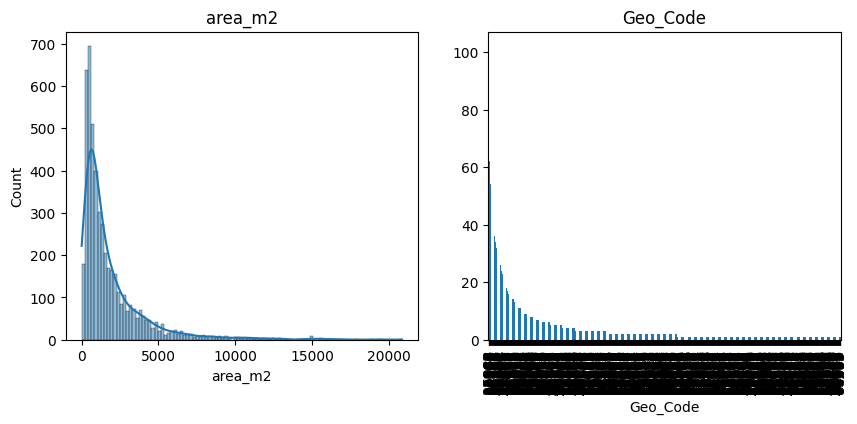

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); sns.histplot(df_train['area_m2'].dropna(), kde=True); plt.title('area_m2')
plt.subplot(1,2,2); df_train['Geo_Code'].value_counts().plot.bar(); plt.title('Geo_Code')
plt.show()